<b> BIRCH algorithm, which stands for Balanced Iterative Reducing and Clustering using Hierarchies, is a clustering algorithm designed for large-scale databases. It was proposed by Tian Zhang, Raghu Ramakrishnan, and Miron Livny in 1996. BIRCH is particularly useful for clustering applications where the entire dataset cannot fit into memory.</b>


Here are some key characteristics and features of the BIRCH algorithm:



<b> Incremental Clustering:</b>
*   BIRCH uses an incremental approach to build a hierarchical clustering
    structure. It processes the data in small batches rather than requiring the entire dataset to be present in memory at once.

<b> Hierarchical Clustering:</b>
*   The algorithm builds a hierarchical clustering structure, represented as a
    tree (BIRCH tree). This structure allows for a more efficient exploration of the data's inherent structure.

<b> Cluster Features:</b>
*   BIRCH uses a feature vector to represent each cluster. The feature vector
    includes the number of points in the cluster, the linear sum, and the squared sum of the data points. This compact representation helps in efficient updating and merging of clusters.

<b> Clustering Criterion:</b>
*   BIRCH uses a clustering criterion based on a user-defined threshold. It
    involves monitoring the radius and number of points in each cluster, and clusters are split or merged based on this criterion.

<b> CF Tree:</b>
*   The BIRCH algorithm employs a data structure called the CF tree (Clustering
    Feature tree) to represent the hierarchical clustering. The CF tree helps in efficiently updating and navigating the clustering structure.

<b> Parameter Settings:</b>
*   BIRCH requires the specification of two parameters: the branching factor
    (maximum number of sub-clusters in a node) and the threshold (maximum diameter of a sub-cluster).

## Import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import Birch
from sklearn import metrics

## Load the dataset

In [ ]:
#data = sns.load_dataset("iris".data,columns=iris.feature_names)
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Replace categorical values to encoded data using LabelEncoder

In [ ]:
le = LabelEncoder()
encoded = le.fit_transform(data['species'])
encoded
data['Categories_species']=encoded
data.drop('species', axis=1, inplace=True)

## Filling Null values

In [ ]:
data.isna().sum()

sepal_length          0
sepal_width           0
petal_length          0
petal_width           0
Categories_species    0
dtype: int64

## Seperate the input (x) and output features (y)

In [ ]:
x = data.drop(['Categories_species'],axis=1)
y = data['Categories_species']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)


## Perform BIRCH clustering with 3 clusters

In [ ]:
birch=Birch(n_clusters=3)
birch.fit(x)
preds=birch.labels_
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Confusion matrix

In [ ]:
metrics.confusion_matrix(y,preds)

array([[ 1, 49,  0],
       [50,  0,  0],
       [20,  0, 30]])

## Comparision of clusters from y and pred

In [ ]:
y.value_counts()

0    50
1    50
2    50
Name: Categories_species, dtype: int64

In [ ]:
data['preds']=preds

In [ ]:
data['preds'].value_counts()

0    71
1    49
2    30
Name: preds, dtype: int64

## Visualize Prediction

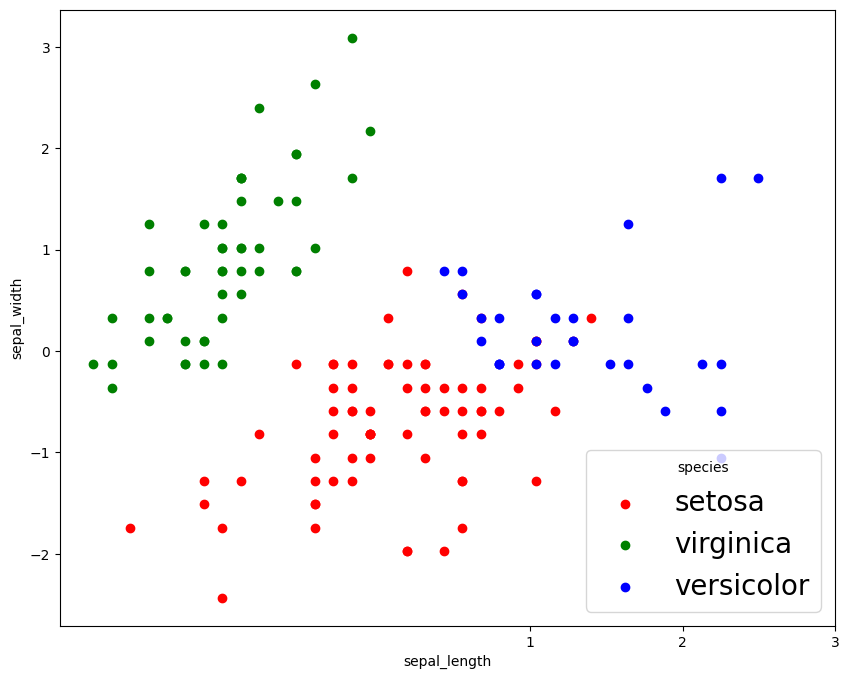

In [ ]:
color_dict={0:'red',1:'green',2:'blue'}
label_dict={0:'setosa',1:'virginica',2:'versicolor'}
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)

for i in np.unique(preds):
    j=np.where(preds==i)
    ax.scatter(x[:,0][j],x[:,1][j], color=color_dict[i], label=label_dict[i])

ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.xaxis.set_ticks([1,2,3])
ax.legend(title='species', fontsize=20,)